# Sampling in Python

In [2]:
import pandas as pd

# Load the dataset

attrition_pop = pd.read_feather('attrition.feather')

# Show the first few rows of the dataset
attrition_pop.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,96,High,1,Research_Scientist,Very_High,Single,1232,19281,1,No,14,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,50,High,1,Sales_Representative,High,Single,1675,26820,1,Yes,19,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,54,High,1,Laboratory_Technician,High,Single,1420,25233,1,No,13,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,69,Medium,1,Sales_Representative,High,Single,1200,9724,1,No,12,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,69,High,1,Sales_Representative,Medium,Single,1878,8059,1,Yes,14,Excellent,Very_High,0,0,3,Better,0,0,0,0


# Chapter3.Sampling Distributions

## 3.1 Relative error of point estimates

In [12]:
coffee_rating = pd.read_feather('coffee_ratings_full.feather')

# Show the first few rows of the dataset
coffee_rating.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,producer,number_of_bags,bag_weight,in_country_partner,harvest_year,grading_date,owner_1,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300.0,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,None,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0.12,0.0,0.0,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300.0,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12,0.0,0.0,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,None,None,5.0,1,Specialty Coffee Association,None,"May 31st, 2010",Grounds for Health Admin,Bourbon,None,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00,0.0,0.0,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320.0,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,None,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0.11,0.0,0.0,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300.0,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12,0.0,0.0,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [13]:
#calculating sample size: sample size is number of rows
len(coffee_rating.sample(n=300))
#
len(coffee_rating.sample(frac=0.25))

334

In [14]:
#Various sample size larger sample sizes gives more acurate result
print(coffee_rating["total_cup_points"].mean())
print(coffee_rating.sample(n=10)["total_cup_points"].mean())
print(coffee_rating.sample(n=100)["total_cup_points"].mean())
print(coffee_rating.sample(n=100)["total_cup_points"].mean())
print(coffee_rating.sample(n=1000)["total_cup_points"].mean())

82.15120328849028
82.00899999999999
81.7836
82.3933
82.17471


### Calculating relative errors

The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

In [15]:
#calculating relative error as percentage
population_mean= coffee_rating["total_cup_points"].mean()
#point estimate:
sample_mean= coffee_rating.sample(n=1000)["total_cup_points"].mean()
# relative error as percentage
rel_error_per= 100* abs(population_mean - sample_mean)/population_mean

print(rel_error_per)

0.018729745753919676


### Relative error vs. sample size

The plot shows the relative error in the proportion of employee attritions, using simple random sampling, for sample sizes from 2 to 1400 (the size of the population).

样本大小与相对误差

这是相对误差与样本大小的线图。我们可以看到，随着样本大小的增加，相对误差减小，除此之外，该图还具有其他重要特性。首先，蓝线非常嘈杂，特别是对于小样本大小。如果我们的样本大小很小，通过在样本中添加一两个随机行，我们计算的样本均值可能会有很大的不同。其次，线的振幅一开始就相当陡峭。当我们有一个小样本大小时，只需再添加几个样本就可以大大提高准确性。在图的右侧，线的陡度较小。如果我们已经有一个大样本大小，再添加几行样本并不会带来太多好处。最后，在图的最右侧，即样本大小为整个总体时，相对误差减少为零。

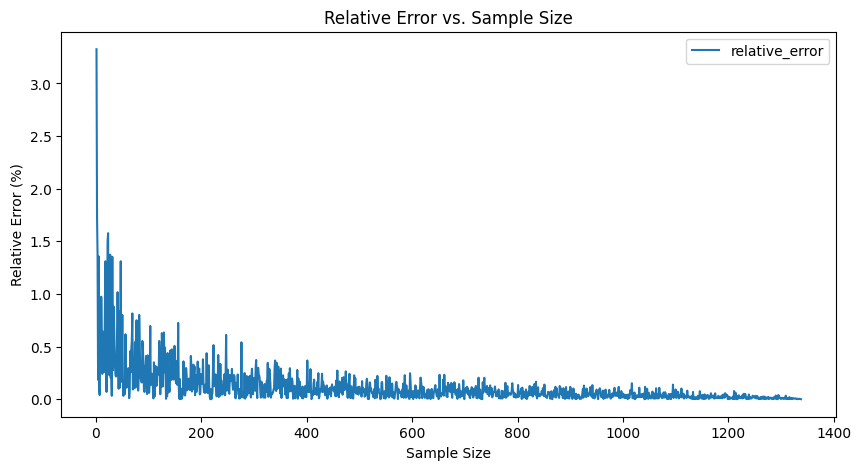

In [16]:
# based on the error shown in picture two, we need to add a conditionthat ensures we never attempt to take a sample that is larger than the size of the data in the DataFrame.
# This can be done by setting `replace=False` and ensuring that the sample size does not exceed the length of the DataFrame.


import matplotlib.pyplot as plt
import pandas as pd

# Let's assume coffee_rating is already defined as a DataFrame from previous context.
# Also, we assume that population_mean is already calculated.

# We'll recreate the errors DataFrame to reset it.
errors_df = pd.DataFrame(columns=['sample_size', 'relative_error'])

# We should not attempt to sample more than the number of rows we have in our DataFrame.
max_sample_size = len(coffee_rating)

# Adjust the loop to ensure the sample size does not exceed the number of rows in the DataFrame.
for sample_size in range(1, max_sample_size + 1):  # Now up to the size of the DataFrame
    sample_mean = coffee_rating.sample(n=sample_size, replace=False)['total_cup_points'].mean()
    rel_error = 100 * abs(population_mean - sample_mean) / population_mean
    errors_df = errors_df.append({'sample_size': sample_size, 'relative_error': rel_error}, ignore_index=True)

# Now we plot the DataFrame
plt.figure(figsize=(10, 5))  # Size to somewhat match the screenshot
plt.plot(errors_df['sample_size'], errors_df['relative_error'], label='relative_error')
plt.xlabel('Sample Size')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error vs. Sample Size')
plt.legend()
plt.show()


### Calculating relative errors

The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.

The most common metric for assessing accuracy is relative error. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.

attrition_pop and mean_attrition_pop (the mean of the Attrition column of attrition_pop) are available; pandas is loaded as pd.

In [17]:
#Task1. Generate a simple random sample from attrition_pop of fifty rows, setting the seed to 2022.Calculate the mean employee Attrition in the sample.Calculate the relative error between mean_attrition_srs50 and mean_attrition_pop as a percentage.

mean_attrition_pop = attrition_pop["Attrition"].mean()

# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop - mean_attrition_srs100) / mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

62.78481012658227


In [18]:
# Task2. Calculate the relative error percentage again. This time, use a simple random sample of 100 one hundred rows of attrition_pop.

mean_attrition_pop = attrition_pop["Attrition"].mean()

# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop - mean_attrition_srs100) / mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

#Samply the best! As you increase the sample size, the sample mean generally gets closer to the population mean, and the relative error decreases.

6.962025316455695


## 3.2 Creating a sampling distribution

### Replicating samples

When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.

复制样本

当你计算一个点估计，比如一个样本均值时，你所计算的值取决于包含在样本中的行。这意味着答案中存在一些随机性。为了量化这种随机性引起的变化，你可以创建许多样本，并计算每个样本的样本均值（或其他统计量）。
attrition_pop is available; pandas and matplotlib.pyplot are loaded with their usual aliases.

In [19]:
# Task1 Replicate the provided code so that it runs 500 times. Assign the resulting list of sample means to mean_attritions.

# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)
  
# Print out the first few entries of the list
print(mean_attritions[0:5])

[0.15, 0.21666666666666667, 0.18333333333333332, 0.13333333333333333, 0.16666666666666666]


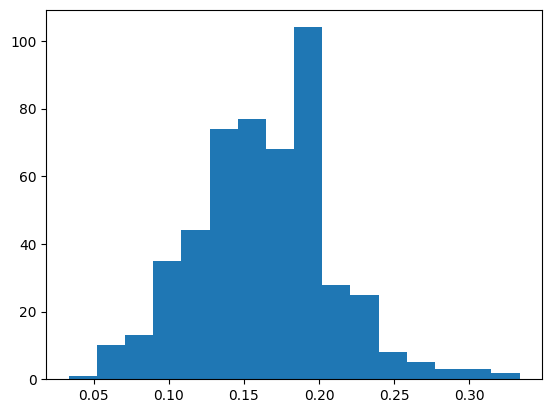

In [20]:
#Task2.Draw a histogram of the mean_attritions list with 16 bins.

# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
	mean_attritions.append(
    	attrition_pop.sample(n=60)['Attrition'].mean()
	)

# Create a histogram of the 500 sample means
plt.hist(mean_attritions, bins=16)
plt.show()


## 3.3 Approximate sampling distributions

### Exact sampling distribution

To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.

The distribution of a sample statistic is called the sampling distribution. When we can calculate this exactly, rather than using an approximation, it is known as the exact sampling distribution.

Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)



In [21]:
# Task1.Expand a grid representing 5 8-sided dice. That is, create a DataFrame with five columns from a dictionary, named die1 to die5. The rows should contain all possibilities for throwing five dice, each numbered 1 to 8.

# It appears the error is due to not importing the itertools module.
# Let's import the module and define the function correctly, then call it.

import itertools
import pandas as pd

# Define the expand_grid function which uses itertools.product
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

# Now we call the expand_grid function with the dictionary of dice sides
dice = expand_grid({
    'die1': [1, 2, 3, 4, 5, 6, 7, 8],
    'die2': [1, 2, 3, 4, 5, 6, 7, 8],
    'die3': [1, 2, 3, 4, 5, 6, 7, 8],
    'die4': [1, 2, 3, 4, 5, 6, 7, 8],
    'die5': [1, 2, 3, 4, 5, 6, 7, 8]
})

# Print the result
dice.head()  # Just to show the first few rows instead of printing the entire DataFrame


,die1,die2,die3,die4,die5
0,1,1,1,1,1
1,1,1,1,1,2
2,1,1,1,1,3
3,1,1,1,1,4
4,1,1,1,1,5


In [22]:
#Task2.Add a column, mean_roll, to dice, that contains the mean of the five rolls as a categorical.
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Print result
print(dice)

       die1  die2  die3  die4  die5 mean_roll
0         1     1     1     1     1       1.0
1         1     1     1     1     2       1.2
2         1     1     1     1     3       1.4
3         1     1     1     1     4       1.6
4         1     1     1     1     5       1.8
...     ...   ...   ...   ...   ...       ...
32763     8     8     8     8     4       7.2
32764     8     8     8     8     5       7.4
32765     8     8     8     8     6       7.6
32766     8     8     8     8     7       7.8
32767     8     8     8     8     8       8.0

[32768 rows x 6 columns]


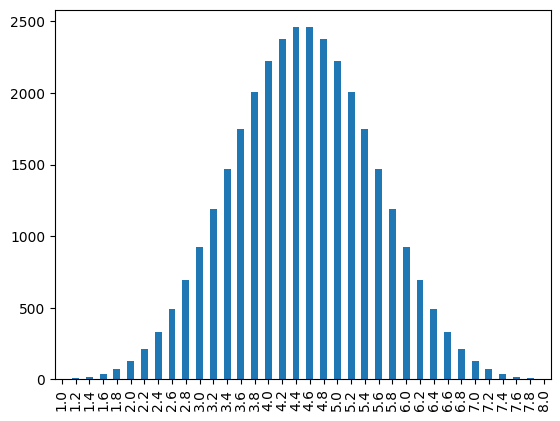

In [23]:
#Task3.Create a bar plot of the mean_roll categorical column, so it displays the count of each mean_roll in increasing order from 1.0 to 8.0.

# Expand a grid representing 5 8-sided dice
dice = expand_grid(
  {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
   'die2': [1, 2, 3, 4, 5, 6, 7, 8],
   'die3': [1, 2, 3, 4, 5, 6, 7, 8],
   'die4': [1, 2, 3, 4, 5, 6, 7, 8],
   'die5': [1, 2, 3, 4, 5, 6, 7, 8]
  })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] + 
                     dice['die3'] + dice['die4'] + 
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice['mean_roll'].value_counts(sort=False).plot(kind="bar")
plt.show()


### Generating an approximate sampling distribution

Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is 8**5, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.

In this situation, you can calculate an approximate sampling distribution by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.

pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases.

In [27]:
import numpy as np
# task1 Sample one to eight, five times, with replacement,Calculate the mean of five_rolls.
five_rolls = np.random.choice(list(range(1, 9)), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

5.6


In [28]:
# Taks2.Replicate the sampling code 1000 times, assigning each result to the list sample_means_1000.
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Print the first 10 entries of the result
print(sample_means_1000[0:10])

[5.0, 3.4, 4.0, 6.2, 5.4, 4.2, 4.8, 4.4, 4.4, 3.0]


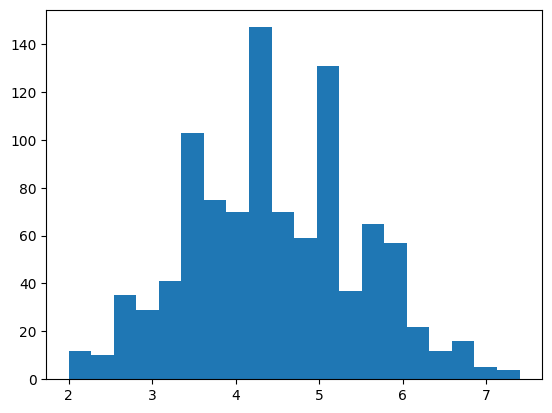

In [29]:
#Plot sample_means_1000 as a histogram with 20 bins.
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000, bins=20)
plt.show()

Applaudable approximating! Once your dataset gets sufficiently big, exact sampling distributions cannot be calculated, so an approximate sampling distribution must be used. Notice that the histogram is close to but not exactly the same as the shape of the bar graph from the previous exercise.

## 3.4 Standard errors and the Central Limit Theorem

### Population & sampling distribution means

One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.

Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500.

attrition_pop, sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 are available; numpy as np is loaded.

In [3]:
import pandas as pd
import numpy as np

# Load the dataset (assuming attrition_pop has already been loaded as per picture 1)
# attrition_pop = pd.read_feather('attrition.feather')

# Function to create a sampling distribution
def create_sampling_distribution(data, sample_size, num_samples=1000):
    np.random.seed(0)  # For reproducibility
    sample_means = []
    for _ in range(num_samples):
        sample = data.sample(n=sample_size, replace=True)  # Simple random sampling with replacement
        sample_means.append(sample['Attrition'].mean())
    return sample_means

# Create sampling distributions for different sample sizes
sampling_distribution_5 = create_sampling_distribution(attrition_pop, 5)
sampling_distribution_50 = create_sampling_distribution(attrition_pop, 50)
sampling_distribution_500 = create_sampling_distribution(attrition_pop, 500)


**conclusion: Regardless of sample size, the mean of the sampling distribution is a close approximation to the population mean.**

In [4]:
# Task1.Calculate the mean of sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 (a mean of sample means).

#Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)


print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)



0.16640000000000005
0.16116000000000003
0.16141399999999997


### Population & sampling distribution variation

You just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly, as a result of the central limit theorem, the standard deviation of the sampling distribution has an interesting relationship with the population parameter's standard deviation and the sample size.

attrition_pop, sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 are available; numpy is loaded with its usual alias.

In [5]:
#Task1. Calculate the standard deviation of sampling_distribution_5, sampling_distribution_50, and sampling_distribution_500 (a standard deviation of sample means).

# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)


0.16858072090087722
0.05112796170852568
0.016076786590207233


当样本容量增加时，我们可以看到样本均值的标准差减小，这体现了中心极限定理

How are the standard deviations of the sampling distributions related to the population standard deviation and the sample size?
the the standard deviations of the sampling distributions is approximately equal to the the population standard deviation divided by the squre root of the sample size


# Chapter4. Bootstrap Distributions

You’ll get to grips with resampling to perform bootstrapping and estimate variation in an unknown population. You’ll learn the difference between sampling distributions and bootstrap distributions using resampling.

In [2]:
import pandas as pd

# Load the dataset

spotify_pop = pd.read_feather('spotify_2000_2020.feather')

# Show the first few rows of the dataset
spotify_pop.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [3]:
import pandas as pd
# Assuming the dataset has been loaded correctly
# spotify_pop = pd.read_feather('spotify_2000_2020.feather')

# Create a subset of the dataset including only the 'artists', 'name', and 'danceability' columns
spotify_sample = spotify_pop[['artists', 'name', 'danceability']]

# Reset the index to create a new column 'index' that retains the old index values
spotify_sample = spotify_sample.reset_index()

# Show the first few rows of the subset to verify
print(spotify_sample.head())


   index          artists                   name  danceability
0      0  ['David Bauer']      Shout to the Lord         0.567
1      1   ['Etta James']               Miss You         0.821
2      2    ['Quasimoto']              Real Eyes         0.706
3      3  ['Millencolin']  Penguins & Polarbears         0.368
4      4   ['Steve Chou']                     黃昏         0.501


### Generating a bootstrap distribution

The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.

To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, 

- you start with a sample and sample that with replacement. 
- After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, 
- then replicate the process many times. In each case, you can visualize the distribution with a histogram.

Here, spotify_sample is a subset of the spotify_population dataset. To make it easier to see how resampling works, a row index column called 'index' has been added, and only the artist name, song name, and danceability columns have been included.

spotify_sample is available; pandas, numpy, and matplotlib.pyplot are loaded with their usual aliases.

In [4]:
#Task1.Generate a single bootstrap resample from spotify_sample
import numpy as np
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Print the resample
print(spotify_1_resample)

       index  ... danceability
6217    6217  ...        0.640
18279  18279  ...        0.527
12655  12655  ...        0.462
28504  28504  ...        0.836
40210  40210  ...        0.435
...      ...  ...          ...
21610  21610  ...        0.705
4741    4741  ...        0.449
41044  41044  ...        0.491
32301  32301  ...        0.834
26180  26180  ...        0.226

[41656 rows x 4 columns]


In [5]:
#Task2. Calculate the mean of the danceability column of spotify_1_resample using numpy.
# Generate 1 bootstrap resample
spotify_1_resample = spotify_sample.sample(frac=1, replace=True)

# Calculate of the danceability column of spotify_1_resample
mean_danceability_1 = np.mean(spotify_1_resample['danceability'])

# Print the result
print(mean_danceability_1)

0.5907837790474362


In [6]:
#Task3.Replicate the expression provided 1000 times.
mean_danceability_1000=[]
for i in range(1000):
    mean_danceability_1000.append(
np.mean(spotify_sample.sample(frac=1,replace=True)['danceability'])
    )
# print the result
print(mean_danceability_1000)

[0.5934862396773574, 0.5905626992510083, 0.5924313184175148, 0.5919060759554446, 0.5914441449010946, 0.5907494046475898, 0.5906268604762819, 0.5898433454964471, 0.5915977098137123, 0.5910155535817169, 0.59151599769541, 0.5900773069905895, 0.5904020813328211, 0.589405190128673, 0.5930839662953715, 0.590292531688112, 0.5905136138851548, 0.5913272781832148, 0.5921819185711542, 0.591872695410025, 0.5909258810255426, 0.5914696682350682, 0.5924234636066833, 0.5917723305166124, 0.5914666506625696, 0.5910467015555982, 0.5907810783560592, 0.5913201387555215, 0.5899034472825043, 0.5919068105434991, 0.591157749183791, 0.591334717687728, 0.5920699851161898, 0.5916833493374304, 0.5932353298444403, 0.5902680022085653, 0.5902053149606298, 0.5907267164394084, 0.5905092111580564, 0.5925096072594584, 0.5933345832533129, 0.5913377736700596, 0.5903990709621664, 0.5904054301901287, 0.5906092831764932, 0.5899923252352604, 0.5924789562127905, 0.591974599097369, 0.5907513107355483, 0.5919392956596888, 0.59215

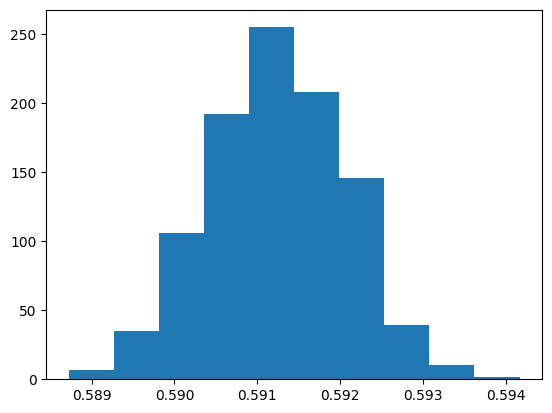

In [7]:
#Task4.Create a bootstrap distribution by drawing a histogram of mean_danceability_1000
import matplotlib.pyplot as plt

mean_danceability_1000=[]
for i in range(1000):
    mean_danceability_1000.append(
np.mean(spotify_sample.sample(frac=1,replace=True)['danceability'])
    )


#Draw a histogram of the resample 
plt.hist(mean_danceability_1000)
plt.show()

Beautiful bootstrapping! From the smaller sample of Spotify songs, we can estimate the mean danceability statistic in the population. Since we have a distribution of statistics, we can even quantify how accurate our estimate is.

### Calculating confidence intervals

You have learned about two methods for calculating confidence intervals: the quantile method and the standard error method. The standard error method involves using the inverse cumulative distribution function (inverse CDF) of the normal distribution to calculate confidence intervals. In this exercise, you'll perform these two methods on the Spotify data.

spotify_population, spotify_sample, and bootstrap_distribution are available; pandas and numpy are loaded with their usual aliases, and norm has been loaded from scipy.stats.

In [8]:
# Key step use the previous step_mean_danceability_1000 set to boost trping distribution
bootstrap_distribution = mean_danceability_1000

In [9]:
#Task1.Generate a 95% confidence interval using the quantile method on the bootstrap distribution, setting the 0.025 quantile as lower_quant and the 0.975 quantile as upper_quant.

# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(bootstrap_distribution, 0.025)
upper_quant = np.quantile(bootstrap_distribution, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

#result (54.56816, 55.1674)


(0.5896106311815824, 0.5928125632561935)


Generate a 95% confidence interval using the standard error method from the bootstrap distribution.
- Calculate point_estimate as the mean of bootstrap_distribution, and standard_error as the standard deviation of bootstrap_distribution.
- Calculate lower_se as the 0.025 quantile of an inv. CDF from a normal distribution with mean point_estimate and standard deviation standard_error.
- Calculate upper_se as the 0.975 quantile of that same inv. CDF.

In [11]:
#Task2.标准误差法求置信区间
import numpy as np
from scipy.stats import norm
# Find the mean均值 and std dev标准偏差 of the bootstrap distribution自举分布
point_estimate = np.mean(bootstrap_distribution)
standard_error = np.std(bootstrap_distribution, ddof=1)

# Find the lower limit of the confidence interval求置信区间下限
lower_se = norm.ppf(0.025, loc=point_estimate, scale=standard_error)

# Find the upper limit of the confidence interval求置信区间上限
upper_se = norm.ppf(0.975, loc=point_estimate, scale=standard_error)

# Print standard error method confidence interval
print((lower_se, upper_se))

#(54.56464443118767, 55.16750236881231)

(0.5895946122148364, 0.5928916027265886)


### The most important things

There are two results from the last chapter that are really important for hypothesis testing, and it's important to make sure you understand them. 

- Firstly, the standard deviation of a bootstrap distribution statistic is a good approximation for the standard error of the sampling distribution. 

- Secondly, you calculated confidence intervals for statistics using both the quantile method and the standard error method, and they gave very similar answers.

That means that the normal distribution tends to be a good approximation for bootstrap distributions.